## Preprocessing 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import librosa
import librosa.display
import IPython.display as ipd


In [2]:
import os
general_path = 'D:/datasets_for_final_year/Data'
print(list(os.listdir(f'{general_path}/genres_original/')))

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [3]:
y, sr = librosa.load(f'{general_path}/genres_original/blues/0_blues.00000.wav') # here data is y and sr is the sample rate

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')



y: [ 0.00732422  0.01660156  0.00762939 ... -0.04373169 -0.05706787
 -0.04086304] 

y shape: (66150,) 

Sample Rate (KHz): 22050 



## 2D Representation: Sound Waves

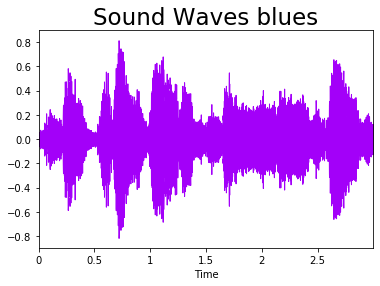

In [4]:
librosa.display.waveplot(y = y, sr = sr, color = "#A300F9");
plt.title("Sound Waves blues", fontsize = 23);

In [5]:
filename=f'{general_path}/genres_original/blues/0_blues.00000.wav'
ipd.Audio(filename)

In [6]:
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)


## Mel Spectrogram 

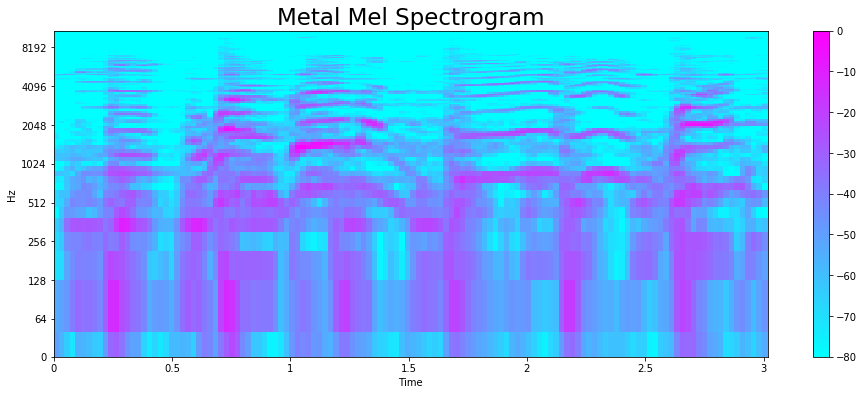

In [7]:
y, sr = librosa.load(f'{general_path}/genres_original/blues/0_blues.00000.wav')


S = librosa.feature.melspectrogram(y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar();
plt.title("Metal Mel Spectrogram", fontsize = 23);

## Audio Features

## Zero Crossing Rate  

In [8]:
# Total zero_crossings in our 1 song
zero_crossings = librosa.zero_crossings(y, pad=False)
print(sum(zero_crossings))

5505


## Harmonics 

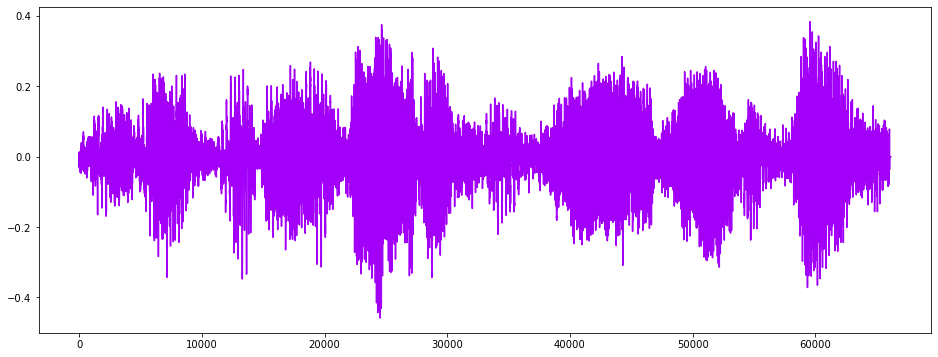

In [9]:
y_harm, _ = librosa.effects.hpss(y)
plt.figure(figsize = (16, 6))
plt.plot(y_harm, color = '#A300F9');


In [10]:
y_harm.mean()

-7.9288984e-05

## Tempo BMP (beats per minute)

In [11]:
tempo, _ = librosa.beat.beat_track(y, sr = sr)
tempo

129.19921875

## Spectral Centroid

In [12]:
spectral_centroids = librosa.feature.spectral_centroid(y, sr=sr)[0]

print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')



Centroids: [2175.02383311 2103.86995762 1955.28566681 1810.90607115 1934.21713495
 2065.45177313 1928.59847344 1793.2682419  1750.13373261 1657.55763552
 1666.62314745 1652.23795784 1430.04474625 1328.55462825 1345.34813503
 1445.30935785 1457.80353566 1498.8843244  1668.65964817 1812.15731305
 1776.65073102 1815.99384718 1502.6082652  1388.71282823 1692.08513758
 1676.50521201 1416.8066537  1266.94086614 1247.01641813 1448.71642276
 1895.78516074 2083.74235207 1924.26477219 1760.09357313 1754.5160311
 1656.75360958 1620.61651232 1711.84278043 1672.87879487 1587.79149099
 1527.45209235 1731.77193803 1760.14573427 1417.26463605 1454.62446118
 1899.7533029  2074.24625772 1989.89594607 1822.85852902 1787.05968632
 1703.06003872 1823.62065881 1875.76077782 1553.3606842  1493.78113444
 1516.73931732 1544.77570781 1733.70055088 1887.16189765 1920.56862522
 1868.72600556 1827.19639252 1766.58041421 1772.12968367 1685.74804058
 1525.72725091 1765.7555643  1798.2288441  1593.67627152 1374.33308

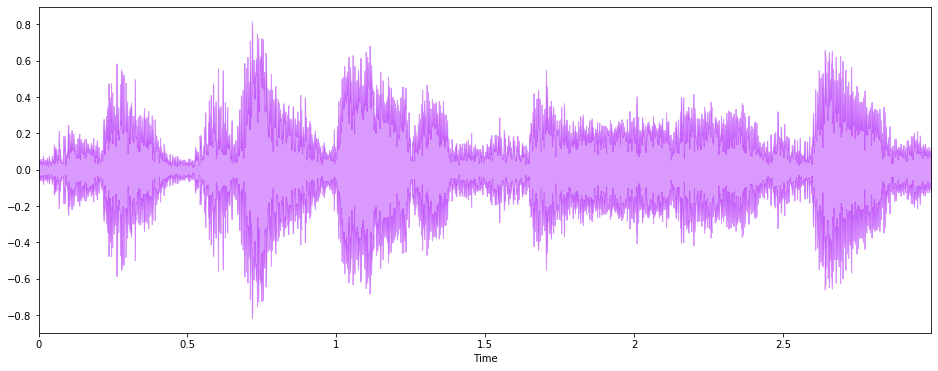

In [13]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y, sr=sr, alpha=0.4, color = '#A300F9');

## Spectral Rollof 

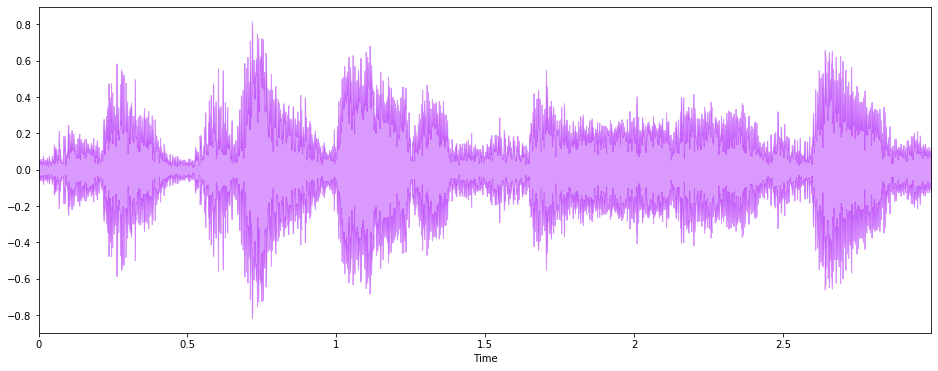

In [14]:
spectral_rolloff = librosa.feature.spectral_rolloff(y, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveplot(y, sr=sr, alpha=0.4, color = '#A300F9');

## Mel-Frequency Cepstral Coefficients:

mfccs shape: (20, 130)


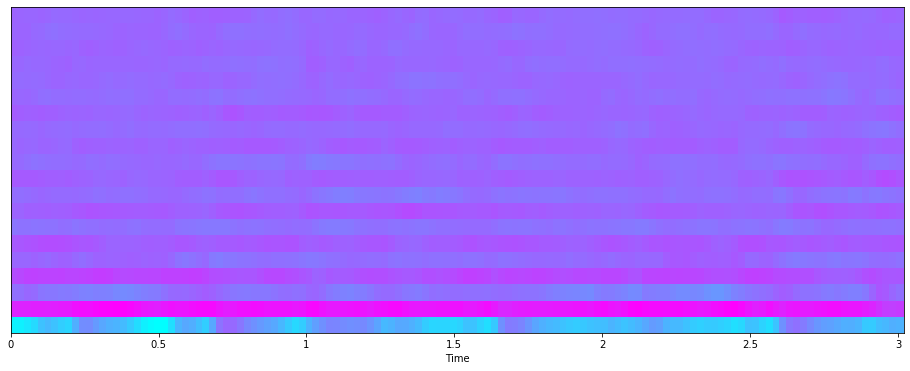

In [15]:
mfccs = librosa.feature.mfcc(y, sr=sr)
print('mfccs shape:', mfccs.shape)

#Displaying  the MFCCs:
plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');

## Feature Extraction 

In [16]:
def getmetadata(filename):
    import librosa
    import numpy as np


    y, sr = librosa.load(filename)
    #fetching tempo

    onset_env = librosa.onset.onset_strength(y, sr)
    tempo = librosa.beat.tempo(onset_envelope=onset_env, sr=sr)

    #fetching beats

    y_harmonic, y_percussive = librosa.effects.hpss(y)
    tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)

    #chroma_stft

    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)

    #rmse

    rmse = librosa.feature.rms(y=y)

    #fetching spectral centroid

    spec_centroid = librosa.feature.spectral_centroid(y, sr=sr)[0]

    #spectral bandwidth

    spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)

    #fetching spectral rolloff

    spec_rolloff = librosa.feature.spectral_rolloff(y+0.01, sr=sr)[0]

    #zero crossing rate

    zero_crossing = librosa.feature.zero_crossing_rate(y)

    #mfcc

    mfcc = librosa.feature.mfcc(y=y, sr=sr)

    #metadata dictionary

    metadata_dict = {'chroma_stft_mean':np.mean(chroma_stft),'rms_mean':np.mean(rmse),
                     'spectral_centroid_mean':np.mean(spec_centroid),'spectral_bandwidth_mean':np.mean(spec_bw), 
                     'rolloff_mean':np.mean(spec_rolloff), 'zero_crossing_rate_mean':np.mean(zero_crossing), 'harmony_mean':np.mean(y_harmonic)}

    for i in range(1,21):
        metadata_dict.update({'mfcc'+str(i)+'_mean':np.mean(mfcc[i-1])})
    
    metadata_dict.update({'tempo':tempo})
    return list(metadata_dict.values())


In [17]:
print(getmetadata(filename))

[0.3354343, 0.13040528, 1773.2858767878147, 1972.723622043702, 3689.71435546875, 0.08185096153846154, -7.9288984e-05, -118.63056, 125.07478, -23.44858, 41.323166, -5.9622126, 20.120884, -16.04814, 17.865843, -14.624667, 10.264739, -9.710336, 10.172429, -4.6947584, 8.414781, -7.2258954, -2.8496406, -3.2412252, 0.721986, -5.0433073, -0.23765764, 129.19921875]


In [18]:
import pandas  as pd
import numpy as np

In [19]:
data=pd.read_csv('features_3_sec_.csv')

In [20]:

data.head()

,filename,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmonic_mean,tempo,mfcc1_mean,...,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean,label
0,blues.00000.0.wav,0.335406,0.130405,1773.065032,1972.744388,3714.560359,0.081851,-0.000078,129.199219,-118.627914,...,10.183875,-4.681614,8.417439,-7.233477,-2.853603,-3.241280,0.722209,-5.050335,-0.243027,blues
1,blues.00000.1.wav,0.343065,0.112699,1816.693777,2010.051501,3869.682242,0.087173,-0.000099,123.046875,-125.590706,...,8.145000,-7.717751,8.397150,-8.300493,4.074709,-6.055294,0.159015,-2.837699,5.784063,blues
2,blues.00000.2.wav,0.346815,0.132003,1788.539719,2084.565132,3997.639160,0.071383,-0.000066,123.046875,-132.441940,...,11.853963,-4.677677,6.571110,-2.424750,4.806280,-1.768610,2.378768,-1.938424,2.517375,blues
3,blues.00000.3.wav,0.363639,0.132565,1655.289045,1960.039988,3568.300218,0.069426,-0.000014,123.046875,-118.231087,...,10.389314,-4.362739,9.156193,-9.889441,-1.359111,-3.841155,1.218588,-3.580352,3.630866,blues
4,blues.00000.4.wav,0.335579,0.143289,1630.656199,1948.503884,3469.992864,0.070095,0.000041,123.046875,-105.968376,...,17.045437,-5.681399,5.705521,-7.986080,2.092937,0.664582,1.689446,-3.392489,0.536961,blues


In [21]:
data.columns

Index(['filename', 'chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean',
       'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_mean',
       'harmonic_mean', 'tempo', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean',
       'mfcc4_mean', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean',
       'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean',
       'mfcc13_mean', 'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean',
       'mfcc17_mean', 'mfcc18_mean', 'mfcc19_mean', 'mfcc20_mean', 'label'],
      dtype='object')

In [22]:
df=data.drop(['filename'], axis = 1)

In [23]:
df.columns

Index(['chroma_stft_mean', 'rms_mean', 'spectral_centroid_mean',
       'spectral_bandwidth_mean', 'rolloff_mean', 'zero_crossing_rate_mean',
       'harmonic_mean', 'tempo', 'mfcc1_mean', 'mfcc2_mean', 'mfcc3_mean',
       'mfcc4_mean', 'mfcc5_mean', 'mfcc6_mean', 'mfcc7_mean', 'mfcc8_mean',
       'mfcc9_mean', 'mfcc10_mean', 'mfcc11_mean', 'mfcc12_mean',
       'mfcc13_mean', 'mfcc14_mean', 'mfcc15_mean', 'mfcc16_mean',
       'mfcc17_mean', 'mfcc18_mean', 'mfcc19_mean', 'mfcc20_mean', 'label'],
      dtype='object')

In [24]:
df.shape

(9990, 29)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   chroma_stft_mean         9990 non-null   float64
 1   rms_mean                 9990 non-null   float64
 2   spectral_centroid_mean   9990 non-null   float64
 3   spectral_bandwidth_mean  9990 non-null   float64
 4   rolloff_mean             9990 non-null   float64
 5   zero_crossing_rate_mean  9990 non-null   float64
 6   harmonic_mean            9990 non-null   float64
 7   tempo                    9990 non-null   float64
 8   mfcc1_mean               9990 non-null   float64
 9   mfcc2_mean               9990 non-null   float64
 10  mfcc3_mean               9990 non-null   float64
 11  mfcc4_mean               9990 non-null   float64
 12  mfcc5_mean               9990 non-null   float64
 13  mfcc6_mean               9990 non-null   float64
 14  mfcc7_mean              

## Correlation 

In [26]:
corr=df.corr()

In [27]:
corr

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmonic_mean,tempo,mfcc1_mean,mfcc2_mean,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
chroma_stft_mean,1.000000,0.424706,0.534670,0.464617,0.526881,0.457080,0.034305,0.019084,0.573974,-0.513978,...,0.108459,0.400529,-0.036171,0.297993,-0.078784,0.228293,-0.103968,0.168254,-0.062985,0.193666
rms_mean,0.424706,1.000000,0.470781,0.495142,0.500178,0.293745,0.065134,0.015668,0.795000,-0.453606,...,0.133593,0.134779,0.043769,0.113960,0.012184,0.055563,-0.013952,0.087615,0.024552,0.082251
spectral_centroid_mean,0.534670,0.470781,1.000000,0.890382,0.974360,0.865487,0.050559,0.002111,0.686196,-0.931435,...,0.144027,0.118541,0.058537,0.118186,0.035098,0.116866,0.026879,0.177934,0.018651,0.191512
spectral_bandwidth_mean,0.464617,0.495142,0.890382,1.000000,0.951000,0.577015,0.064358,0.011910,0.615946,-0.887156,...,0.277708,0.004485,0.199991,0.025717,0.125946,0.012459,0.089523,0.084331,0.074453,0.133895
rolloff_mean,0.526881,0.500178,0.974360,0.951000,1.000000,0.755442,0.051363,0.007359,0.688779,-0.923652,...,0.167872,0.110553,0.087349,0.109308,0.042899,0.098611,0.035871,0.158802,0.033071,0.182626
zero_crossing_rate_mean,0.457080,0.293745,0.865487,0.577015,0.755442,1.000000,0.021418,-0.010724,0.590236,-0.739485,...,-0.040104,0.190734,-0.112906,0.174409,-0.073881,0.196571,-0.053256,0.233676,-0.058103,0.211582
harmonic_mean,0.034305,0.065134,0.050559,0.064358,0.051363,0.021418,1.000000,0.010954,0.026708,-0.041915,...,0.038731,-0.069008,0.046471,-0.054840,0.054587,-0.086724,0.008767,-0.061114,0.038825,-0.036651
tempo,0.019084,0.015668,0.002111,0.011910,0.007359,-0.010724,0.010954,1.000000,0.019736,-0.013957,...,0.014124,-0.028308,0.020236,-0.002120,0.010221,-0.007302,-0.007811,-0.010346,0.002024,-0.013771
mfcc1_mean,0.573974,0.795000,0.686196,0.615946,0.688779,0.590236,0.026708,0.019736,1.000000,-0.612310,...,0.000314,0.247536,-0.127468,0.173863,-0.152374,0.131637,-0.165295,0.145346,-0.106033,0.131098
mfcc2_mean,-0.513978,-0.453606,-0.931435,-0.887156,-0.923652,-0.739485,-0.041915,-0.013957,-0.612310,1.000000,...,-0.186252,-0.138877,-0.108140,-0.152560,-0.067593,-0.131528,-0.039512,-0.165099,-0.017996,-0.173734


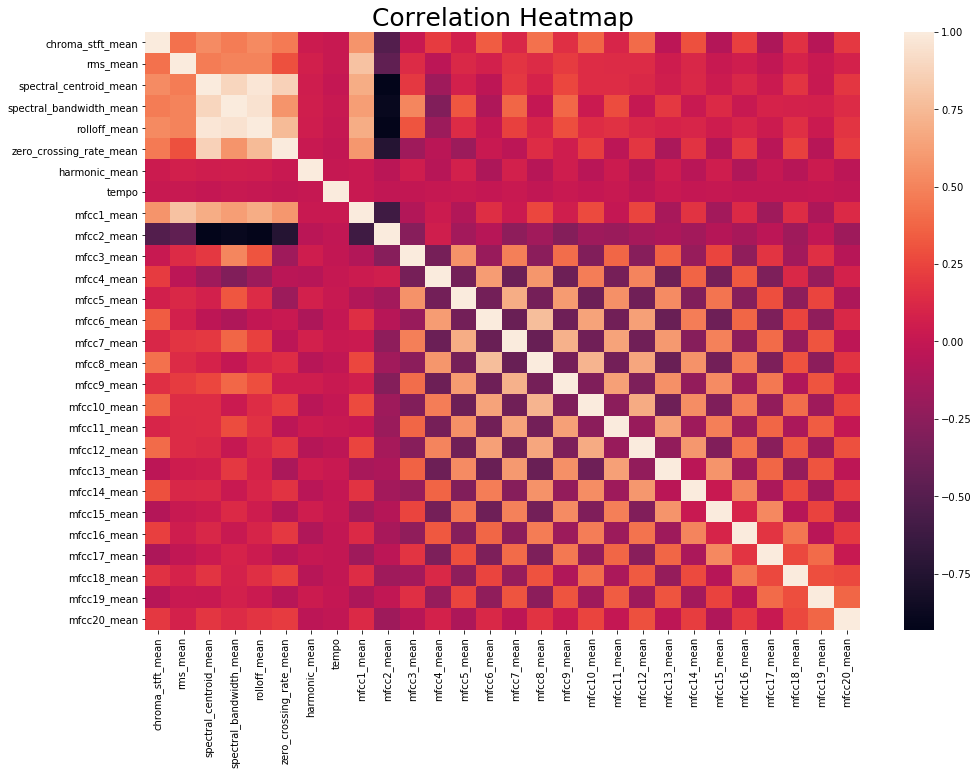

In [28]:
f, ax = plt.subplots(figsize=(16, 11));
sns.heatmap(corr)
plt.title('Correlation Heatmap', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);

## IQR 

In [29]:
data.describe()

,chroma_stft_mean,rms_mean,spectral_centroid_mean,spectral_bandwidth_mean,rolloff_mean,zero_crossing_rate_mean,harmonic_mean,tempo,mfcc1_mean,mfcc2_mean,...,mfcc11_mean,mfcc12_mean,mfcc13_mean,mfcc14_mean,mfcc15_mean,mfcc16_mean,mfcc17_mean,mfcc18_mean,mfcc19_mean,mfcc20_mean
count,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,...,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000,9990.000000
mean,0.379534,0.130859,2199.219431,2241.385959,4566.076592,0.102578,-0.000365,124.887709,-145.424643,100.988234,...,-6.504168,4.936315,-5.186272,2.164629,-4.175271,1.448240,-4.198706,0.739943,-2.497306,-0.917584
std,0.090466,0.068545,751.860611,543.854449,1642.065335,0.045651,0.001699,32.911676,106.456350,34.673178,...,7.821168,7.563187,7.132049,6.084283,5.929457,5.735149,5.677379,5.181313,5.111799,5.253243
min,0.107108,0.000953,472.741636,499.162910,658.336275,0.013525,-0.026672,24.377211,-662.171631,-12.053392,...,-40.008194,-23.759195,-29.350500,-23.390091,-30.467087,-26.850016,-27.809795,-20.733809,-27.448456,-35.640659
25%,0.315698,0.083782,1630.680158,1887.455789,3378.311110,0.067290,-0.000127,103.359375,-201.474651,76.043871,...,-12.203228,-0.433691,-10.352716,-1.860355,-8.184258,-2.227478,-7.951722,-2.516638,-5.734123,-4.004475
50%,0.384741,0.121253,2208.628237,2230.575595,4631.377892,0.097868,-0.000013,123.046875,-120.118343,98.618740,...,-6.320308,4.685837,-4.803917,2.242880,-4.150815,1.461623,-4.443021,0.733772,-2.702366,-1.030939
75%,0.442443,0.176328,2712.581883,2588.340505,5591.634521,0.132749,0.000015,143.554688,-69.897551,122.263046,...,-0.819838,10.680293,-0.149823,6.263140,-0.216918,5.149752,-0.726945,3.888734,0.514246,2.216603
max,0.749481,0.442567,5432.534406,3708.147554,9487.446477,0.347705,0.015688,287.109375,107.941315,251.212494,...,46.630760,51.125900,36.172966,34.733578,27.739742,39.144405,34.048843,36.970322,31.365425,34.212101


In [ ]:
def mod_outlier(df):
        df1 = df.copy()
        df = df._get_numeric_data()


        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)

        iqr = q3 - q1

        lower_bound = q1 -(1.5 * iqr) 
        upper_bound = q3 +(1.5 * iqr)


        for col in df.columns:
            for i in range(0,len(df[col])):
                if df[col][i] < lower_bound[col]:            
                    df[col][i] = lower_bound[col]

                if df[col][i] > upper_bound[col]:            
                    df[col][i] = upper_bound[col]    


        for col in df.columns:
            df1[col] = df[col]

        return(df1)